In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline

In [89]:
df = pd.read_csv("Zomato data .csv")

In [90]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [92]:
print ( df['online_order'].value_counts() )
print('----------------------------------')
print(df['book_table'].value_counts())
print('----------------------------------')
print(df['listed_in(type)'].value_counts())
print('----------------------------------')

online_order
No     90
Yes    58
Name: count, dtype: int64
----------------------------------
book_table
No     140
Yes      8
Name: count, dtype: int64
----------------------------------
listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64
----------------------------------


In [93]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['online_order'] = le.fit_transform(df['online_order'])
# df['book_table'] = le.fit_transform(df['book_table'])
# df['listed_in(type)'] = le.fit_transform(df['listed_in(type)'])

In [94]:
df['rate']

0      4.1/5
1      4.1/5
2      3.8/5
3      3.7/5
4      3.8/5
       ...  
143    3.3/5
144    3.3/5
145    4.0/5
146    3.0/5
147    3.9/5
Name: rate, Length: 148, dtype: object

In [95]:
df['rate'] = df['rate'].str.replace('/5','').astype(float)

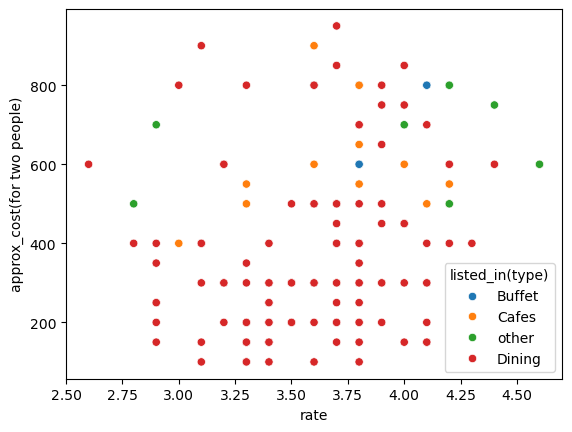

In [96]:
sns.scatterplot(x='rate', y='approx_cost(for two people)',
                hue='listed_in(type)', data=df)
plt.show()

In [97]:
cm =  df.iloc[:,1:].corr()
cm

ValueError: could not convert string to float: 'Yes'

In [ ]:
#plt.figure(figsize=(6, 5))
#sns.heatmap(cm, annot=True, cmap='coolwarm',
 #           fmt='.2f', linewidths=0.5)
#plt.title('Correlation Matrix Heatmap')
#plt.show()
#rate vs onlineorder
#booktable vs rate
#rate vs votes
#approchcsost vs listed type
#

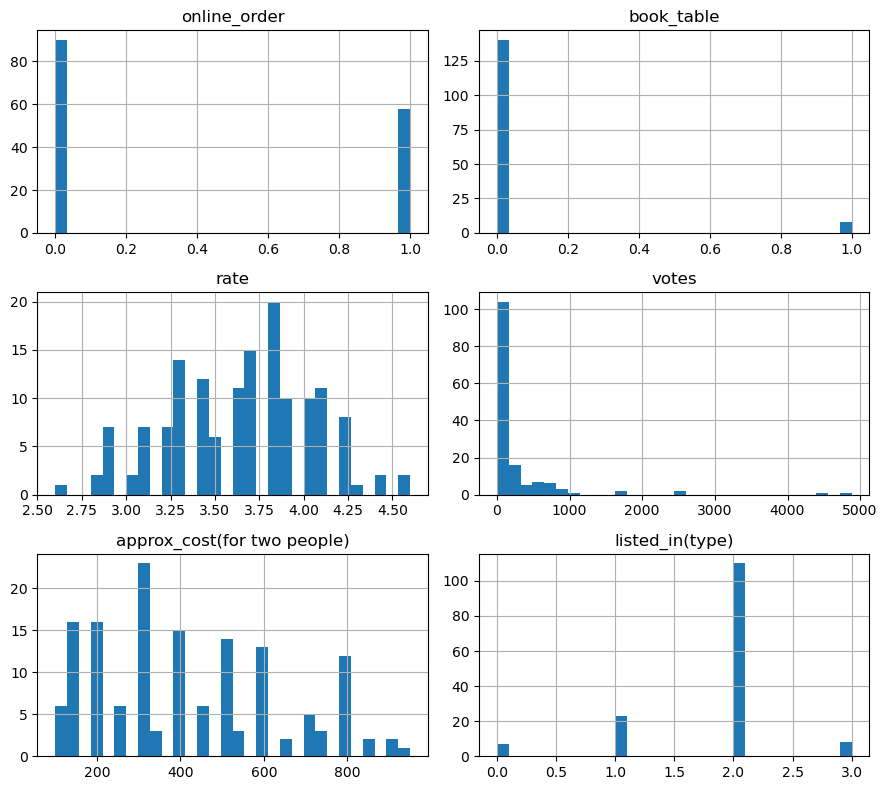

In [ ]:
df.hist(bins=30, figsize=(9, 8))
plt.tight_layout()
plt.show()

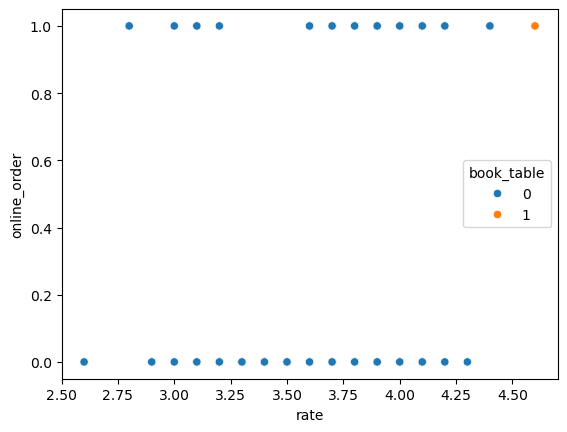

In [ ]:
sns.scatterplot(x='rate', y='online_order',hue='book_table', data=df)
plt.show()

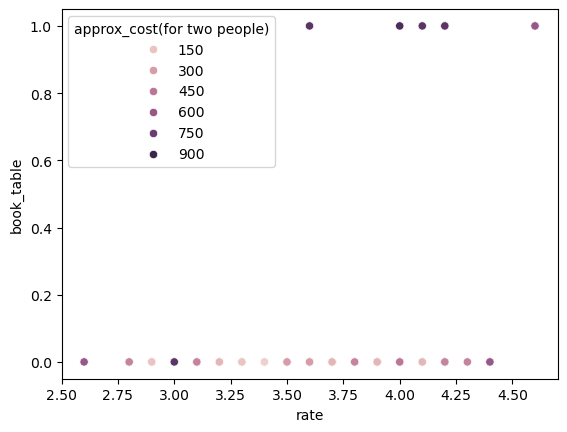

In [ ]:
sns.scatterplot(x='rate', y='book_table',hue='approx_cost(for two people)',  data=df)
plt.show()

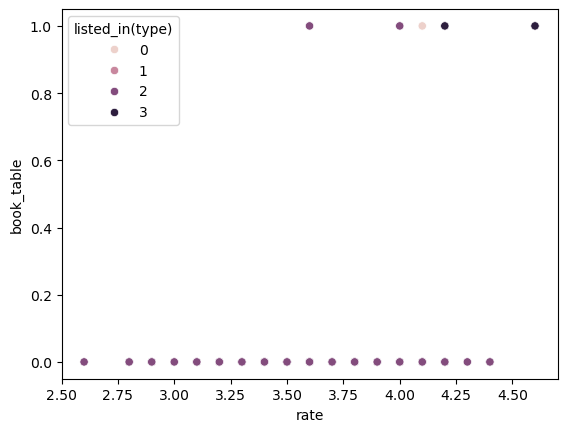

In [ ]:
sns.scatterplot(x='rate', y='book_table',
                hue='listed_in(type)',  data=df)
plt.show()

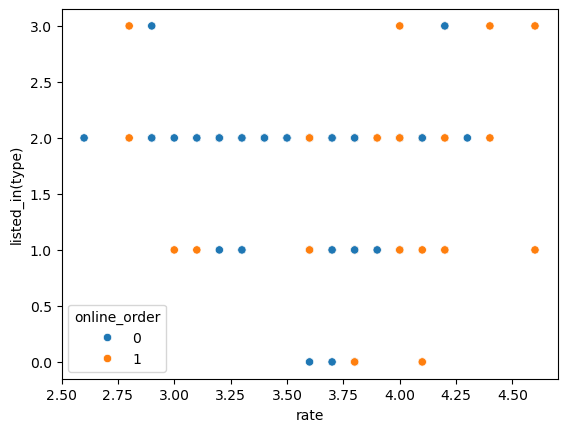

In [ ]:
sns.scatterplot(x='rate', y='listed_in(type)',
                hue='online_order',  data=df)
plt.show()

Text(0, 0.5, 'Votes')

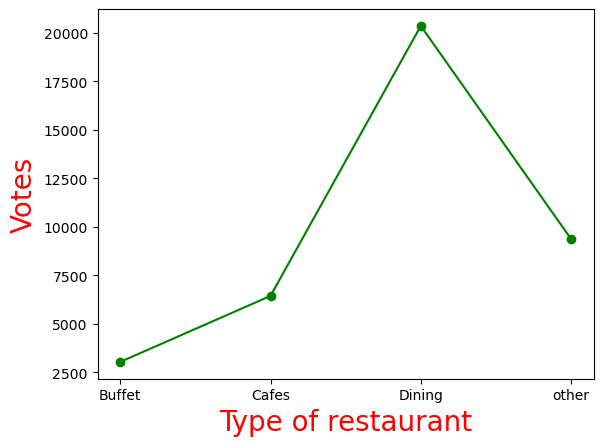

In [98]:


grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)

<Axes: xlabel='online_order', ylabel='count'>

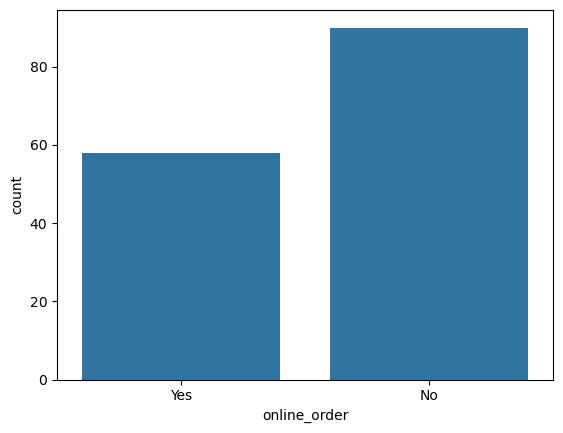

In [99]:
sns.countplot(x=df['online_order'])

<Axes: xlabel='online_order', ylabel='rate'>

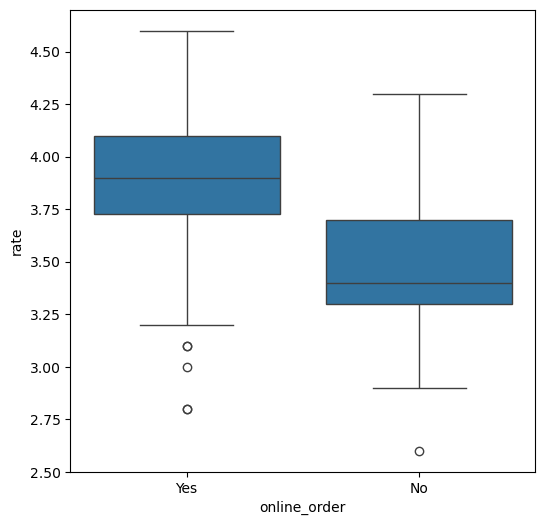

In [100]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='online_order', y='rate', data=df)

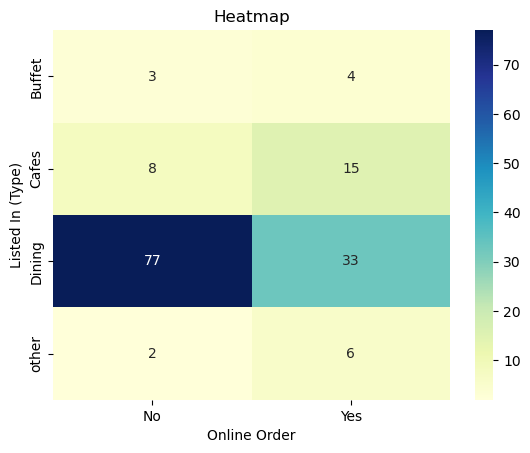

In [101]:
pivot_table = df.pivot_table(
    index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()